#Import Library

In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

##Load DataFrame

In [2]:
file='final_clus.csv'

In [3]:
df=pd.read_csv(file)
df.head()

,user_id,transactions_id,location,gender,age,times_visit,traffic_medium,traffic_name,traffic_source,payment_method,voucher,product_category,product_name,times_trx,time_visit_to_trx_minutes,product_qty,product_price,product_amount,status,total_amount
0,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,No Discounts,Hobbies,Hobbies D,2021-11-21 12:07:55 UTC,8.90,1,1300000,1300000,completed,2560000
1,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,No Discounts,Clothing,Clothing C,2021-11-21 12:07:55 UTC,8.90,1,60000,60000,completed,2560000
2,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,No Discounts,Shoes,Shoes E,2021-11-21 12:07:55 UTC,8.90,1,1200000,1200000,completed,2560000
3,2086,1986,Bandung,Female,64,2020-09-04 08:03:46 UTC,Direct,NaN,Direct,Biller Services,Cashback,Shoes,Shoes D,2020-09-04 08:12:33 UTC,8.78,1,800000,800000,canceled,1120000
4,2086,1986,Bandung,Female,64,2020-09-04 08:03:46 UTC,Direct,NaN,Direct,Biller Services,Cashback,Health&Beauty,Health&Beauty C,2020-09-04 08:12:33 UTC,8.78,1,100000,100000,canceled,1120000


**Menfilter data** : mengambil data paling terakhir **2022-12-31**

In [ ]:
df=df[df['times_visit']<='2022-12-31']

In [ ]:
df['times_trx']=pd.to_datetime(df['times_trx'])

In [ ]:
def code_timestamp():
    df['hour_code']=df['times_trx'].dt.hour
    df['dayTrx_code']=df['times_trx'].dt.dayofweek
    df['monthTrx_code']=df['times_trx'].dt.month
    df['yearTrx_code']=df['times_trx'].dt.year

In [ ]:
code_timestamp()

#Clustering RMF

Melakukan grouping berdasarkan **Transaksi_id**

In [ ]:
agg_dict = {
    'product_category': ', '.join,
    'product_name': ', '.join,
    'product_amount': 'sum',
    'gender': 'first',
    'age' :'first',
    'product_qty' :'sum',
    'traffic_medium': 'first',
    'traffic_name': 'first',
    'traffic_source': 'first',
    'payment_method': 'first',
    'voucher': 'first',
    'times_trx': 'first',
    'time_visit_to_trx_minutes': 'first',
    'status': 'first',
    'total_amount': 'first',
    'hour_code': 'first',
    'dayTrx_code': 'first',
    'monthTrx_code': 'first',
    'yearTrx_code': 'first'
}

result_df = df.groupby(['user_id','transactions_id']).agg(agg_dict).reset_index()


In [ ]:
result_df.head()

,user_id,transactions_id,product_category,product_name,product_amount,gender,age,product_qty,traffic_medium,traffic_name,...,payment_method,voucher,times_trx,time_visit_to_trx_minutes,status,total_amount,hour_code,dayTrx_code,monthTrx_code,yearTrx_code
0,1,8073,"Electronics, Stationery","Electronics A, Stationery D",135000,Male,22,2,None,google search,...,Biller Services,No Discounts,2021-09-04 13:17:34+00:00,27.80,completed,135000,13,5,9,2021
1,2,1,"Hobbies, Sport Equipment, Groceries","Hobbies D, Sport Equipment A, Groceries E",1815000,Male,55,3,Organic Search,None,...,Virtual Account,Direct Discount,2019-12-01 02:38:44+00:00,9.35,canceled,1815000,2,6,12,2019
2,2,4078,"Mother&Care, Health&Beauty, Clothing, Groceries","Mother&Care F, Health&Beauty E, Clothing B, Gr...",580000,Male,55,4,Direct,None,...,Debit,No Discounts,2021-01-17 14:37:01+00:00,8.82,canceled,580000,14,6,1,2021
3,2,4823,"Groceries, Clothing, Stationery","Groceries H, Clothing D, Stationery E",620000,Male,55,3,Direct,None,...,Virtual Account,Direct Discount,2021-02-21 11:24:10+00:00,9.05,canceled,620000,11,6,2,2021
4,2,10182,"Mother&Care, Electronics, Health&Beauty, Groce...","Mother&Care F, Electronics D, Health&Beauty D,...",1285000,Male,55,5,Organic Search,None,...,Biller Services,Cashback,2021-11-23 18:43:32+00:00,9.23,canceled,1285000,18,1,11,2021


Menambah kolom baru berdasarkan jumlah item yang dibeli per transaksi

In [ ]:
result_df['item/trx amount'] = df.groupby(['user_id', 'transactions_id'])['product_name'].count().values

In [ ]:
result_df.head()

,user_id,transactions_id,product_category,product_name,product_amount,gender,age,product_qty,traffic_medium,traffic_name,...,voucher,times_trx,time_visit_to_trx_minutes,status,total_amount,hour_code,dayTrx_code,monthTrx_code,yearTrx_code,item/trx amount
0,1,8073,"Electronics, Stationery","Electronics A, Stationery D",135000,Male,22,2,None,google search,...,No Discounts,2021-09-04 13:17:34+00:00,27.80,completed,135000,13,5,9,2021,2
1,2,1,"Hobbies, Sport Equipment, Groceries","Hobbies D, Sport Equipment A, Groceries E",1815000,Male,55,3,Organic Search,None,...,Direct Discount,2019-12-01 02:38:44+00:00,9.35,canceled,1815000,2,6,12,2019,3
2,2,4078,"Mother&Care, Health&Beauty, Clothing, Groceries","Mother&Care F, Health&Beauty E, Clothing B, Gr...",580000,Male,55,4,Direct,None,...,No Discounts,2021-01-17 14:37:01+00:00,8.82,canceled,580000,14,6,1,2021,4
3,2,4823,"Groceries, Clothing, Stationery","Groceries H, Clothing D, Stationery E",620000,Male,55,3,Direct,None,...,Direct Discount,2021-02-21 11:24:10+00:00,9.05,canceled,620000,11,6,2,2021,3
4,2,10182,"Mother&Care, Electronics, Health&Beauty, Groce...","Mother&Care F, Electronics D, Health&Beauty D,...",1285000,Male,55,5,Organic Search,None,...,Cashback,2021-11-23 18:43:32+00:00,9.23,canceled,1285000,18,1,11,2021,5


In [ ]:
min=min(result_df['times_trx'])
max=max(result_df['times_trx'])

melihat priode database

In [ ]:
print(f'awal trx {min} \nakhir trx{max}')

awal trx 2019-12-01 02:38:44+00:00 
akhir trx2022-12-30 21:44:02+00:00


In [ ]:
df2=result_df.copy()

In [ ]:
df2.columns

Index(['user_id', 'transactions_id', 'product_category', 'product_name',
       'product_amount', 'gender', 'age', 'product_qty', 'traffic_medium',
       'traffic_name', 'traffic_source', 'payment_method', 'voucher',
       'times_trx', 'time_visit_to_trx_minutes', 'status', 'total_amount',
       'hour_code', 'dayTrx_code', 'monthTrx_code', 'yearTrx_code',
       'item/trx amount'],
      dtype='object')

In [ ]:
categories = ['gender','voucher','payment_method']

In [ ]:
#encode category type
for category in categories :
  df2['code_' + category]=df2[category].astype('category').cat.codes

In [ ]:
df2.head()

,user_id,transactions_id,product_category,product_name,product_amount,gender,age,product_qty,traffic_medium,traffic_name,...,status,total_amount,hour_code,dayTrx_code,monthTrx_code,yearTrx_code,item/trx amount,code_gender,code_voucher,code_payment_method
0,1,8073,"Electronics, Stationery","Electronics A, Stationery D",135000,Male,22,2,None,google search,...,completed,135000,13,5,9,2021,2,1,3,0
1,2,1,"Hobbies, Sport Equipment, Groceries","Hobbies D, Sport Equipment A, Groceries E",1815000,Male,55,3,Organic Search,None,...,canceled,1815000,2,6,12,2019,3,1,2,5
2,2,4078,"Mother&Care, Health&Beauty, Clothing, Groceries","Mother&Care F, Health&Beauty E, Clothing B, Gr...",580000,Male,55,4,Direct,None,...,canceled,580000,14,6,1,2021,4,1,3,2
3,2,4823,"Groceries, Clothing, Stationery","Groceries H, Clothing D, Stationery E",620000,Male,55,3,Direct,None,...,canceled,620000,11,6,2,2021,3,1,2,5
4,2,10182,"Mother&Care, Electronics, Health&Beauty, Groce...","Mother&Care F, Electronics D, Health&Beauty D,...",1285000,Male,55,5,Organic Search,None,...,canceled,1285000,18,1,11,2021,5,1,0,0


Membuat database baru berdasarkan RFM

In [ ]:
RFM = df2.groupby('user_id').agg({
    'times_trx': lambda x: (max - x.max()).days,
    'transactions_id': 'count',
    'total_amount': 'sum'
})

In [ ]:
RFM = RFM.rename(columns={'times_trx': 'Recency','transactions_id':'Frequency', 'total_amount':'Monetery' })

In [ ]:
RFM

,Recency,Frequency,Monetery
user_id,,,
1,482,1,135000
2,19,8,9195000
3,388,1,110000
4,286,1,135000
5,178,5,4405000
...,...,...,...
9128,12,1,435000
9134,10,1,35000
9144,4,1,2135000


melakukan clustering menggunakan **KMeans Algorithm**

In [ ]:
from sklearn.preprocessing import StandardScaler   #meng-Import modul untuk melakukan transformasi pada data

scaler =StandardScaler()
scaled =scaler.fit_transform(RFM)   # melakukan transformasi data (RFM)

In [ ]:
from sklearn.cluster import KMeans

Melakukan Looping untuk melihat jumlah Cluster ideal yang digunakan menggunakan **Elbow Method**

In [ ]:
inertia=[]

for i in np.arange(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit_transform(scaled)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

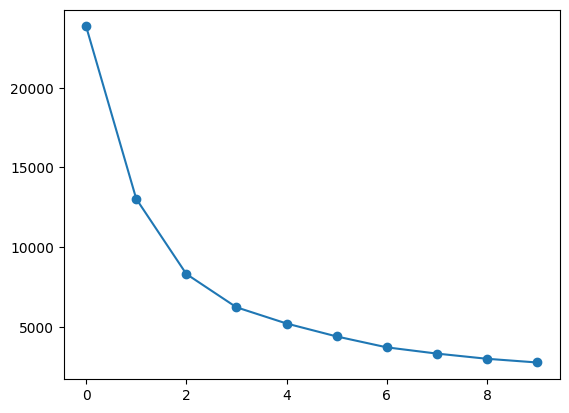

In [ ]:
plt.plot(inertia, marker='o')

Grafik di atas memberikan gambaran jumlah cluster yang cukup ideal adalah 3  

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM['cluster']=(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
RFM

,Recency,Frequency,Monetery,cluster
user_id,,,,
1,482,1,135000,2
2,19,8,9195000,1
3,388,1,110000,0
4,286,1,135000,0
5,178,5,4405000,1
...,...,...,...,...
9128,12,1,435000,0
9134,10,1,35000,0
9144,4,1,2135000,0


melihat statistik descriptive RFM berdasarkan cluster yang telah dibuat

In [ ]:
RFM_2=RFM.groupby('cluster')['Recency','Frequency','Monetery'].mean()

<ipython-input-28-00990cd95813>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  RFM_2=RFM.groupby('cluster')['Recency','Frequency','Monetery'].mean()


In [ ]:
RFM_2.round(2)

,Recency,Frequency,Monetery
cluster,,,
0,186.91,1.73,2068102.85
1,209.60,5.54,8450805.08
2,646.42,1.47,1439216.13


Mengubah code cluster dari angka menjadi Kategori.
Penamaan pada cluster berdarkan statistik descriptive di atas diperoleh ;



1.  **Si Sering** adalah cluster yang mempunyai frekensi transaksi paling banyak dan rata-rata spending paling tinggi (cluster 1)
2.   **So-So** : adalah kelompok Cluster moderate, artinya cluster yang memiliki rata-raat recency paling kecil dan spending rata-rata kedua tertinggi
2. **Si Jarang** : adalah cluster paling yang memiliki rata-rata Recency paling lama (*selisih antar tanggal maksimal yang ditetapkan '2022-12-31' terhadap tanggal terakhir melakukan transaksi*) serta spending rata-rata paling kecil




In [ ]:
profiling ={2 : 'Si Sering', 1 :'So-So', 0:'Si Jarang'}

In [ ]:
df.head()

,user_id,transactions_id,location,gender,age,times_visit,traffic_medium,traffic_name,traffic_source,payment_method,...,time_visit_to_trx_minutes,product_qty,product_price,product_amount,status,total_amount,hour_code,dayTrx_code,monthTrx_code,yearTrx_code
0,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,8.90,1,1300000,1300000,completed,2560000,12,6,11,2021
1,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,8.90,1,60000,60000,completed,2560000,12,6,11,2021
2,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,8.90,1,1200000,1200000,completed,2560000,12,6,11,2021
3,2086,1986,Bandung,Female,64,2020-09-04 08:03:46 UTC,Direct,NaN,Direct,Biller Services,...,8.78,1,800000,800000,canceled,1120000,8,4,9,2020
4,2086,1986,Bandung,Female,64,2020-09-04 08:03:46 UTC,Direct,NaN,Direct,Biller Services,...,8.78,1,100000,100000,canceled,1120000,8,4,9,2020


Melakukan Merger ke data lengkap dengan menambahkan kolom **'cluster'**

In [ ]:
final=df.merge(RFM['cluster'], on='user_id', how='left')

Meng-aplikasikan penamaan cluster yang telah dibuat di atas ke dalam data final

In [ ]:
final['cluster']=final['cluster'].map(profiling)

In [ ]:
final.head()

,user_id,transactions_id,location,gender,age,times_visit,traffic_medium,traffic_name,traffic_source,payment_method,...,product_qty,product_price,product_amount,status,total_amount,hour_code,dayTrx_code,monthTrx_code,yearTrx_code,cluster
0,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,1,1300000,1300000,completed,2560000,12,6,11,2021,So-So
1,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,1,60000,60000,completed,2560000,12,6,11,2021,So-So
2,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,1,1200000,1200000,completed,2560000,12,6,11,2021,So-So
3,2086,1986,Bandung,Female,64,2020-09-04 08:03:46 UTC,Direct,NaN,Direct,Biller Services,...,1,800000,800000,canceled,1120000,8,4,9,2020,So-So
4,2086,1986,Bandung,Female,64,2020-09-04 08:03:46 UTC,Direct,NaN,Direct,Biller Services,...,1,100000,100000,canceled,1120000,8,4,9,2020,So-So


In [ ]:
# final.to_csv('Cluster-RFM(FINAL).csv', index=False)  #simpan untuk divisualisasi dengan tableau

In [ ]:
final1=final.copy()

melakukan copy data frame untuk mengubah format dari **'times_trx'** timestamp menjadi format date **'YYYY-MM-DD'**

In [ ]:
final1['times_trx']=pd.to_datetime(final1['times_trx'])

In [ ]:
final1['times_trx'] = final1['times_trx'].dt.strftime('%Y-%m-%d')

In [ ]:
final.columns

Index(['user_id', 'transactions_id', 'location', 'gender', 'age',
       'times_visit', 'traffic_medium', 'traffic_name', 'traffic_source',
       'payment_method', 'voucher', 'product_category', 'product_name',
       'times_trx', 'time_visit_to_trx_minutes', 'product_qty',
       'product_price', 'product_amount', 'status', 'total_amount',
       'hour_code', 'dayTrx_code', 'monthTrx_code', 'yearTrx_code', 'cluster'],
      dtype='object')

In [ ]:
dem=final[['user_id','location','gender','age','cluster']]

# Insight
Mencari Insight Clustering base on **demografi user**

In [ ]:
demografi=dem.drop_duplicates()

In [ ]:
demografi.shape

(7948, 5)

In [ ]:
demografi.head()

,user_id,location,gender,age,cluster
0,3616,Jakarta Utara,Male,27,So-So
3,2086,Bandung,Female,64,So-So
8,5571,Surabaya,Male,31,So-So
14,357,Kota Bekasi,Male,16,Si Sering
16,1127,Kota Bogor,Male,20,Si Jarang


Find number and average age of User each cluster

In [ ]:
agg={'user_id': 'nunique', 'age': 'mean', 'location':lambda x: x.mode()[0],'gender': lambda x: x.mode()[0]}

In [ ]:
def mode_function(x):
    return x.mode().iloc[0] if not x.empty else None
agg = {
    'user_id': 'nunique',
    'age': 'mean',
    'location': mode_function,
    'gender': mode_function}


In [ ]:
user_demografi=final.groupby('cluster').agg(agg).round(2)

In [ ]:
user_demografi

,user_id,age,location,gender
cluster,,,,
Si Jarang,4628,37.18,Tangerang Selatan,Female
Si Sering,1786,35.24,Kota Tangerang,Female
So-So,1534,40.70,Jakarta Selatan,Male


##create **new dataframe** base on **cluster**

In [ ]:
jrg=final[final['cluster']=='Si Jarang']
so =final[final['cluster']=='So-So']
srg=final[final['cluster']=='Si Sering']

##insight Cluster Si Jarang

In [ ]:
jrg['times_trx'].max()

Timestamp('2022-12-30 21:44:02+0000', tz='UTC')

cluser Si Jarang, terakhir kali bertaksaksi pada $2021-11-22$

$AOV = \frac{Total\ Revenue}{Total\ Order}$

In [ ]:
total_orders_j  = jrg['transactions_id'].nunique()
total_revenue_j= jrg['product_amount'].sum()

# Menghitung AOV (Average Order Value)
aov_j = round(total_revenue_j / total_orders_j,2)

# Menampilkan hasil

print("Average Order Value (AOV):", aov_j)

Average Order Value (AOV): 1193711.65


In [ ]:
jrg.describe(include='object').T

,count,unique,top,freq
location,20051,13,Tangerang Selatan,2220
gender,20051,2,Female,11901
times_visit,20051,8017,2021-11-06 10:55:18 UTC,6
traffic_medium,15819,5,Direct,5182
traffic_name,4755,4,Facebook,1312
traffic_source,17851,5,Direct,5182
payment_method,20051,6,Virtual Account,5528
voucher,20051,4,Delivery Fee Discounts,6646
product_category,20051,10,Clothing,3639
product_name,20051,66,Hobbies B,751


In [ ]:
round(jrg.status.value_counts(normalize=True)*100,2)

completed    58.65
canceled     41.35
Name: status, dtype: float64

##insight cluster So-So

In [ ]:
so['times_trx'].max()

Timestamp('2022-12-30 18:30:53+0000', tz='UTC')

In [ ]:
total_orders_s  = so['transactions_id'].nunique()
total_revenue_s = so['product_amount'].sum()

# Menghitung AOV (Average Order Value)
aov_s = round(total_revenue_s / total_orders_s,2)

# Menampilkan hasil

print("Average Order Value (AOV):", aov_s)

Average Order Value (AOV): 1524045.97


Summary

In [ ]:
so.describe(include='object').T

,count,unique,top,freq
location,33721,13,Jakarta Selatan,8396
gender,33721,2,Male,17919
times_visit,33721,8505,2022-01-30 20:57:13 UTC,10
traffic_medium,26885,5,Direct,11306
traffic_name,7123,4,Facebook,1912
traffic_source,30250,5,Direct,11306
payment_method,33721,6,Virtual Account,10354
voucher,33721,4,No Discounts,15565
product_category,33721,10,Health&Beauty,4696
product_name,33721,65,Mother&Care F,1919


In [ ]:
so.user_id.nunique()

1534

In [ ]:
round(so.status.value_counts(normalize=True)*100,2)

completed    60.65
canceled     39.35
Name: status, dtype: float64

##insight Cluster Si Sering

In [ ]:
total_orders_sr  = srg['transactions_id'].nunique()
total_revenue_sr = srg['product_amount'].sum()

# Menghitung AOV (Average Order Value)
aov_sr = round(total_revenue_sr / total_orders_sr,2)

# Menampilkan hasil

print("Average Order Value (AOV):", aov_sr)

Average Order Value (AOV): 981083.97


In [ ]:
srg.describe(include='object').T

,count,unique,top,freq
location,5667,13,Kota Tangerang,784
gender,5667,2,Female,3627
times_visit,5667,2620,2020-05-19 08:43:49 UTC,6
traffic_medium,4420,5,Direct,1336
traffic_name,1481,4,Facebook,475
traffic_source,5052,5,Direct,1336
payment_method,5667,6,Virtual Account,1446
voucher,5667,4,Delivery Fee Discounts,2379
product_category,5667,10,Health&Beauty,1068
product_name,5667,66,Health&Beauty A,287


In [ ]:
round(srg.status.value_counts(normalize=True)*100,2)

completed    68.36
canceled     31.64
Name: status, dtype: float64

#Basket Analysis
create new dataframe for Basket analysis

In [ ]:
data_basket=final1[['user_id','age','location','transactions_id','times_trx','product_name','product_qty','product_price']]

In [ ]:
data_basket.head()

,user_id,age,location,transactions_id,times_trx,product_name,product_qty,product_price
0,3616,27,Jakarta Utara,10105,2021-11-21,Hobbies D,1,1300000
1,3616,27,Jakarta Utara,10105,2021-11-21,Clothing C,1,60000
2,3616,27,Jakarta Utara,10105,2021-11-21,Shoes E,1,1200000
3,2086,64,Bandung,1986,2020-09-04,Shoes D,1,800000
4,2086,64,Bandung,1986,2020-09-04,Health&Beauty C,1,100000


In [ ]:
basket_level=data_basket[['user_id','product_name']].sort_values(by='user_id',ascending=False)
basket_level['product_name']=basket_level['product_name'].str.strip() #remove white space if any

In [ ]:
basket_level.head()

,user_id,product_name
9199,9149,Sport Equipment B
9200,9149,Hobbies B
9201,9149,Stationery D
49250,9145,Shoes C
56920,9144,Games C


In [ ]:
trx = [i[1]['product_name'].tolist() for i in list(basket_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

<ipython-input-65-37ccf571869f>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx = [i[1]['product_name'].tolist() for i in list(basket_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
trx

[['Electronics A', 'Stationery D'],
 ['Health&Beauty E',
  'Stationery E',
  'Mother&Care F',
  'Electronics E',
  'Electronics D',
  'Mother&Care F',
  'Clothing B',
  'Groceries C',
  'Hobbies D',
  'Clothing C',
  'Groceries E',
  'Stationery E',
  'Groceries E',
  'Health&Beauty D',
  'Sport Equipment A',
  'Health&Beauty A',
  'Mother&Care D',
  'Clothing D',
  'Games D',
  'Electronics B',
  'Health&Beauty C',
  'Stationery E',
  'Mother&Care E',
  'Groceries D',
  'Health&Beauty E',
  'Clothing D',
  'Shoes F',
  'Health&Beauty C',
  'Stationery E',
  'Groceries H'],
 ['Health&Beauty A', 'Clothing F'],
 ['Clothing E', 'Health&Beauty E'],
 ['Mother&Care A',
  'Health&Beauty E',
  'Health&Beauty D',
  'Stationery A',
  'Health&Beauty C',
  'Hobbies D',
  'Mother&Care E',
  'Clothing A',
  'Health&Beauty D',
  'Groceries D',
  'Mother&Care B',
  'Mother&Care F',
  'Clothing C',
  'Clothing B',
  'Health&Beauty C',
  'Clothing E',
  'Mother&Care D',
  'Hobbies D',
  'Stationery C'],

Importing and Setting the apriori options


1.   Minimum Support
2.   Minimum Confidence
3.   Minimum Lift
4.   Lenght = the number of items



In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori ## Importing apriori package
rules = apriori(trx, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

In [ ]:
results = list(rules)

In [ ]:
## Creating user-defined function for arranging the results obtained from model into readable format
def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results]
    y         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(x, y, supports, confidences, lifts))
basket_final = pd.DataFrame(inspect(results), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

In [ ]:
basket_final

,X,Y,Support,Confidence,Lift
0,Electronics C,Games D,0.017740,0.141994,3.537831
1,Electronics C,Games E,0.042904,0.343404,3.581855
2,Electronics C,Games F,0.018495,0.148036,3.381012
3,Electronics C,Groceries B,0.013588,0.108761,3.011969
4,Electronics C,Groceries C,0.044036,0.352467,3.154741
...,...,...,...,...,...
118,Hobbies E,Shoes F,0.033468,0.202435,3.118132
119,Hobbies E,Stationery E,0.071339,0.431507,3.098118
120,Mother&Care F,Stationery E,0.097383,0.458531,3.292143
121,Shoes F,Sport Equipment E,0.019124,0.294574,3.265371


Menampilkan 10 nilai lift tertinggi

In [ ]:
basket_final.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

,X,Y,Support,Confidence,Lift
44,Games E,Groceries E,0.041142,0.429134,3.938517
46,Games E,Hobbies D,0.053473,0.557743,3.922955
10,Electronics D,Games E,0.040010,0.375443,3.916035
56,Games F,Groceries B,0.006165,0.140805,3.899355
43,Games E,Groceries D,0.042526,0.443570,3.886980
107,Groceries E,Stationery E,0.058505,0.536952,3.855186
99,Groceries D,Stationery E,0.061273,0.536935,3.855067
54,Games E,Stationery E,0.051082,0.532808,3.825439
89,Groceries C,Stationery E,0.059260,0.530405,3.808186
58,Games F,Groceries E,0.018118,0.413793,3.797722


#Basket Analysis base on Cluster

In [ ]:
final1.head()

,user_id,transactions_id,location,gender,age,times_visit,traffic_medium,traffic_name,traffic_source,payment_method,...,product_qty,product_price,product_amount,status,total_amount,hour_code,dayTrx_code,monthTrx_code,yearTrx_code,cluster
0,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,1,1300000,1300000,completed,2560000,12,6,11,2021,So-So
1,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,1,60000,60000,completed,2560000,12,6,11,2021,So-So
2,3616,10105,Jakarta Utara,Male,27,2021-11-21 11:59:01 UTC,Organic Search,NaN,Google,Biller Services,...,1,1200000,1200000,completed,2560000,12,6,11,2021,So-So
3,2086,1986,Bandung,Female,64,2020-09-04 08:03:46 UTC,Direct,NaN,Direct,Biller Services,...,1,800000,800000,canceled,1120000,8,4,9,2020,So-So
4,2086,1986,Bandung,Female,64,2020-09-04 08:03:46 UTC,Direct,NaN,Direct,Biller Services,...,1,100000,100000,canceled,1120000,8,4,9,2020,So-So


In [ ]:
final1['cluster'].unique()

array(['So-So', 'Si Sering', 'Si Jarang'], dtype=object)

In [ ]:
Si_Jarang =final1[final1['cluster']=='Si Jarang']
Si_Sering =final1[final1['cluster']=='Si Sering']
So_So     =final1[final1['cluster']=='So-So']

##Basket Cluster si Jarang

In [ ]:
 Si_Jarang=Si_Jarang[['user_id','age','location','transactions_id','times_trx','product_name','product_qty','product_price']]

In [ ]:
jarang_level=Si_Jarang[['user_id','product_name']].sort_values(by='user_id',ascending=False)
jarang_level['product_name']=jarang_level['product_name'].str.strip() #remove white space if any

jarang_level.head()

trx_jarang = [i[1]['product_name'].tolist() for i in list(jarang_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_jarang = apriori(trx_jarang, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_j = list(rules_jarang)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_j]
    y         = [tuple(result[2][0][1])[0] for result in results_j]
    supports    = [result[1] for result in results_j]
    confidences = [result[2][0][2] for result in results_j]
    lifts       = [result[2][0][3] for result in results_j]
    return list(zip(x, y, supports, confidences, lifts))
jarang_final = pd.DataFrame(inspect(results_j), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-77-062a94af788b>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_jarang = [i[1]['product_name'].tolist() for i in list(jarang_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


Final Result Cluster **si Jarang**

In [ ]:
jarang_final.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

,X,Y,Support,Confidence,Lift
73,Groceries E,Stationery E,0.012316,0.337278,7.063000
63,Groceries D,Stationery E,0.012316,0.335294,7.021453
52,Groceries C,Stationery E,0.010588,0.302469,6.334060
31,Games E,Stationery E,0.007131,0.294643,6.170168
19,Games E,Groceries C,0.005186,0.214286,6.121693
20,Games E,Groceries D,0.005186,0.214286,5.833613
82,Groceries H,Stationery E,0.006482,0.277778,5.816993
37,Groceries B,Groceries C,0.002161,0.200000,5.713580
54,Groceries D,Groceries E,0.007131,0.194118,5.315837
61,Groceries D,Shoes F,0.004970,0.135294,5.261691


In [ ]:
Si_Jarang.head()

,user_id,age,location,transactions_id,times_trx,product_name,product_qty,product_price
16,1127,20,Kota Bogor,2444,2020-10-08,Shoes D,1,800000
17,1127,20,Kota Bogor,2444,2020-10-08,Clothing A,1,90000
18,1127,20,Kota Bogor,2444,2020-10-08,Hobbies B,1,900000
19,1127,20,Kota Bogor,2444,2020-10-08,Sport Equipment A,1,450000
20,1193,34,Bandung,1960,2020-09-02,Health&Beauty B,4,50000


Analisis berdasarkan Quarter

In [ ]:
#filter data hanya mengambil data tahun 2022
jarang_2022=Si_Jarang[(Si_Jarang['times_trx'] > '2021-12-31') & (Si_Jarang['times_trx'] <= '2022-12-31')]

In [ ]:
#mengubah format timestamp ke format datetime
jarang_2022['times_trx'] = pd.to_datetime(jarang_2022['times_trx'])

<ipython-input-81-02f4644f7fb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jarang_2022['times_trx'] = pd.to_datetime(jarang_2022['times_trx'])


In [ ]:
#menfilter quarter 1 (Januari-Maret) tahun 2022
Q1 = jarang_2022[jarang_2022['times_trx'].dt.quarter == 1]

In [ ]:
Q1.head()

,user_id,age,location,transactions_id,times_trx,product_name,product_qty,product_price
82,7438,20,Surabaya,12383,2022-02-13,Health&Beauty F,1,40000
83,7438,20,Surabaya,12383,2022-02-13,Clothing D,1,120000
130,6209,20,Jakarta Selatan,11787,2022-01-16,Mother&Care E,1,220000
131,6209,20,Jakarta Selatan,11787,2022-01-16,Health&Beauty C,1,100000
132,7385,57,Kota Tangerang,11880,2022-01-22,Mother&Care E,1,220000


In [ ]:
jQ1_level=Q1[['user_id','product_name']].sort_values(by='user_id',ascending=False)
jQ1_level['product_name']=jQ1_level['product_name'].str.strip() #remove white space if any

jQ1_level.head()

trx_jQ1 = [i[1]['product_name'].tolist() for i in list(jQ1_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_jQ1 = apriori(trx_jQ1, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_jQ1 = list(rules_jQ1)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_jQ1]
    y         = [tuple(result[2][0][1])[0] for result in results_jQ1]
    supports    = [result[1] for result in results_jQ1]
    confidences = [result[2][0][2] for result in results_jQ1]
    lifts       = [result[2][0][3] for result in results_jQ1]
    return list(zip(x, y, supports, confidences, lifts))
jQ1 = pd.DataFrame(inspect(results_jQ1), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-84-aa8a8a9cd155>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_jQ1 = [i[1]['product_name'].tolist() for i in list(jQ1_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
jQ1

,X,Y,Support,Confidence,Lift
0,Clothing B,Groceries C,0.006931,0.093333,3.142222
1,Mother&Care B,Clothing B,0.002970,0.230769,3.107692
2,Clothing C,Groceries E,0.006931,0.089744,3.021368
3,Clothing D,Groceries F,0.007921,0.082474,3.331959
4,Clothing G,Clothing E,0.002970,0.500000,6.474359
...,...,...,...,...,...
73,Mother&Care F,Stationery E,0.008911,0.147541,4.515648
74,Shoes D,Sport Equipment C,0.014851,0.192308,3.132754
75,Shoes D,Stationery B,0.006931,0.089744,3.021368
76,Shoes F,Sport Equipment C,0.002970,0.230769,3.759305


In [ ]:
Q_1=jQ1.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
#filter Q2(April-Juni)
Q2 = jarang_2022[jarang_2022['times_trx'].dt.quarter == 2]

In [ ]:
jQ2_level=Q2[['user_id','product_name']].sort_values(by='user_id',ascending=False)
jQ2_level['product_name']=jQ2_level['product_name'].str.strip() #remove white space if any

jQ2_level.head()

trx_jQ2 = [i[1]['product_name'].tolist() for i in list(jQ2_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_jQ2 = apriori(trx_jQ2, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_jQ2 = list(rules_jQ2)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_jQ2]
    y         = [tuple(result[2][0][1])[0] for result in results_jQ2]
    supports    = [result[1] for result in results_jQ2]
    confidences = [result[2][0][2] for result in results_jQ2]
    lifts       = [result[2][0][3] for result in results_jQ2]
    return list(zip(x, y, supports, confidences, lifts))
jQ2 = pd.DataFrame(inspect(results_jQ2), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-88-47e0d2f71ca2>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_jQ2 = [i[1]['product_name'].tolist() for i in list(jQ2_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
Q_2=jQ2.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
#filter Q3(Juli-September)
Q3 = jarang_2022[jarang_2022['times_trx'].dt.quarter == 3]

In [ ]:
jQ3_level=Q3[['user_id','product_name']].sort_values(by='user_id',ascending=False)
jQ3_level['product_name']=jQ3_level['product_name'].str.strip() #remove white space if any

jQ3_level.head()

trx_jQ3 = [i[1]['product_name'].tolist() for i in list(jQ3_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_jQ3 = apriori(trx_jQ3, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_jQ3 = list(rules_jQ3)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_jQ3]
    y         = [tuple(result[2][0][1])[0] for result in results_jQ3]
    supports    = [result[1] for result in results_jQ3]
    confidences = [result[2][0][2] for result in results_jQ3]
    lifts       = [result[2][0][3] for result in results_jQ3]
    return list(zip(x, y, supports, confidences, lifts))
jQ3 = pd.DataFrame(inspect(results_jQ3), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-91-a0d1dfb8159f>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_jQ3 = [i[1]['product_name'].tolist() for i in list(jQ3_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
Q_3=jQ3.nlargest(n=4, columns="Lift")

In [ ]:
#filter Q4 (Oktober-Desember)
Q4 = jarang_2022[jarang_2022['times_trx'].dt.quarter == 4]

In [ ]:
jQ4_level=Q4[['user_id','product_name']].sort_values(by='user_id',ascending=False)
jQ4_level['product_name']=jQ4_level['product_name'].str.strip() #remove white space if any

jQ4_level.head()

trx_jQ4 = [i[1]['product_name'].tolist() for i in list(jQ4_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_jQ4 = apriori(trx_jQ4, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_jQ4 = list(rules_jQ4)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_jQ4]
    y         = [tuple(result[2][0][1])[0] for result in results_jQ4]
    supports    = [result[1] for result in results_jQ4]
    confidences = [result[2][0][2] for result in results_jQ4]
    lifts       = [result[2][0][3] for result in results_jQ4]
    return list(zip(x, y, supports, confidences, lifts))
jQ4 = pd.DataFrame(inspect(results_jQ4), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-94-f345eebafd07>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_jQ4 = [i[1]['product_name'].tolist() for i in list(jQ4_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
Q_4=jQ4.nlargest(n=4, columns="Lift")

In [ ]:
#menggabungkan semua quarter ke dalam satu dataframe
jarang_all=pd.concat([Q_1,Q_2,Q_3,Q_4],keys=['Q1','Q2','Q3','Q4'])

In [ ]:
jarang_all

X                  Y   Support  Confidence       Lift
Q1 5      Clothing G        Groceries E  0.002970    0.500000  16.833333
   6      Clothing G      Mother&Care A  0.003960    0.666667  16.031746
   33        Games E          Hobbies E  0.005941    0.500000   9.181818
   31        Games E        Groceries C  0.002970    0.250000   8.416667
Q2 32  Electronics E            Games E  0.002336    0.083333   9.727273
   62    Groceries D       Stationery E  0.003115    0.200000   8.855172
   47        Games D       Stationery E  0.002336    0.176471   7.813387
   17     Clothing F          Hobbies A  0.002336    0.085714   7.337143
Q3 89    Groceries G            Shoes E  0.002210    0.666667  30.166667
   17     Clothing I        Groceries C  0.002210    0.666667  20.111111
   6     Groceries G         Clothing D  0.003315    1.000000  13.308824
   19     Clothing I      Mother&Care A  0.002210    0.666667  11.602564
Q4 41    Groceries C       Stationery F  0.005109    0.156863  11.165775
   65        Shoes E  Sport Equipment F  0.003193    0.192308   8.604396
   18  Electronics E            Games D  0.003193    0.094340   7.775571
   11  Electronics C       Stationery F  0.003831    0.101695   7.238829

Insigh dan Rekomendation Cluster Jarang

1.   belum diisi
2.   belum diisi



## Basket Cluster **So-So**

In [ ]:
 So_So=So_So[['user_id','age','location','transactions_id','times_trx','product_name','product_qty','product_price']]

In [ ]:
So_level=So_So[['user_id','product_name']].sort_values(by='user_id',ascending=False)
So_level['product_name']=So_level['product_name'].str.strip() #remove white space if any

So_level.head()

trx_So = [i[1]['product_name'].tolist() for i in list(So_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_So = apriori(trx_So, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_s = list(rules_So)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_s]
    y         = [tuple(result[2][0][1])[0] for result in results_s]
    supports    = [result[1] for result in results_s]
    confidences = [result[2][0][2] for result in results_s]
    lifts       = [result[2][0][3] for result in results_s]
    return list(zip(x, y, supports, confidences, lifts))
So_final = pd.DataFrame(inspect(results_s), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-99-ff978d3fa111>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_So = [i[1]['product_name'].tolist() for i in list(So_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


Final Result Cluster So-So

In [ ]:
So_final.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

,X,Y,Support,Confidence,Lift
6,Hobbies B,Hobbies C,0.007823,0.222222,9.213213
5,Hobbies A,Hobbies C,0.002608,0.125000,5.182432
3,Electronics F,Sport Equipment D,0.004563,0.388889,4.553859
4,Hobbies A,Hobbies B,0.003259,0.156250,4.438657
1,Electronics B,Hobbies B,0.007823,0.146341,4.157182
2,Electronics B,Hobbies C,0.004563,0.085366,3.539222
0,Electronics B,Hobbies A,0.003911,0.073171,3.507622


Analisis Berdasrkan Quarter

In [ ]:
So_2022=So_So[(So_So['times_trx'] > '2021-12-31') & (So_So['times_trx'] <= '2022-12-31')]
So_2022['times_trx'] = pd.to_datetime(So_2022['times_trx'])
Q1s = So_2022[So_2022['times_trx'].dt.quarter == 1]

<ipython-input-101-f897814b3958>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  So_2022['times_trx'] = pd.to_datetime(So_2022['times_trx'])


In [ ]:
sQ1_level=Q1s[['user_id','product_name']].sort_values(by='user_id',ascending=False)
sQ1_level['product_name']=sQ1_level['product_name'].str.strip() #remove white space if any

sQ1_level.head()

trx_sQ1 = [i[1]['product_name'].tolist() for i in list(sQ1_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_sQ1 = apriori(trx_sQ1, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_sQ1 = list(rules_sQ1)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_sQ1]
    y         = [tuple(result[2][0][1])[0] for result in results_sQ1]
    supports    = [result[1] for result in results_sQ1]
    confidences = [result[2][0][2] for result in results_sQ1]
    lifts       = [result[2][0][3] for result in results_sQ1]
    return list(zip(x, y, supports, confidences, lifts))
sQ1 = pd.DataFrame(inspect(results_sQ1), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-102-87006ca4adfd>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_sQ1 = [i[1]['product_name'].tolist() for i in list(sQ1_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
sQ1=sQ1.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
#Quarter 2
Q2s = So_2022[So_2022['times_trx'].dt.quarter == 2]

In [ ]:
sQ2_level=Q2s[['user_id','product_name']].sort_values(by='user_id',ascending=False)
sQ2_level['product_name']=sQ2_level['product_name'].str.strip() #remove white space if any

sQ2_level.head()

trx_sQ2 = [i[1]['product_name'].tolist() for i in list(sQ2_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_sQ2 = apriori(trx_sQ2, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_sQ2 = list(rules_sQ2)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_sQ2]
    y         = [tuple(result[2][0][1])[0] for result in results_sQ2]
    supports    = [result[1] for result in results_sQ2]
    confidences = [result[2][0][2] for result in results_sQ2]
    lifts       = [result[2][0][3] for result in results_sQ2]
    return list(zip(x, y, supports, confidences, lifts))
sQ2 = pd.DataFrame(inspect(results_sQ2), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-105-705f21e4c249>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_sQ2 = [i[1]['product_name'].tolist() for i in list(sQ2_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
sQ2=sQ2.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
#Quarter 3
Q3s = So_2022[So_2022['times_trx'].dt.quarter == 3]

In [ ]:
sQ3_level=Q3s[['user_id','product_name']].sort_values(by='user_id',ascending=False)
sQ3_level['product_name']=sQ3_level['product_name'].str.strip() #remove white space if any

sQ3_level.head()

trx_sQ3 = [i[1]['product_name'].tolist() for i in list(sQ3_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_sQ3 = apriori(trx_sQ3, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_sQ3 = list(rules_sQ3)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_sQ3]
    y         = [tuple(result[2][0][1])[0] for result in results_sQ3]
    supports    = [result[1] for result in results_sQ3]
    confidences = [result[2][0][2] for result in results_sQ3]
    lifts       = [result[2][0][3] for result in results_sQ3]
    return list(zip(x, y, supports, confidences, lifts))
sQ3 = pd.DataFrame(inspect(results_sQ3), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-108-7702f703097d>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_sQ3 = [i[1]['product_name'].tolist() for i in list(sQ3_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
sQ3=sQ3.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
#Quarter 4
Q4s = So_2022[So_2022['times_trx'].dt.quarter == 4]

In [ ]:
sQ4_level=Q4s[['user_id','product_name']].sort_values(by='user_id',ascending=False)
sQ4_level['product_name']=sQ4_level['product_name'].str.strip() #remove white space if any

sQ4_level.head()

trx_sQ4 = [i[1]['product_name'].tolist() for i in list(sQ4_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_sQ4 = apriori(trx_sQ4, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_sQ4 = list(rules_sQ4)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_sQ4]
    y         = [tuple(result[2][0][1])[0] for result in results_sQ4]
    supports    = [result[1] for result in results_sQ4]
    confidences = [result[2][0][2] for result in results_sQ4]
    lifts       = [result[2][0][3] for result in results_sQ4]
    return list(zip(x, y, supports, confidences, lifts))
sQ4 = pd.DataFrame(inspect(results_sQ4), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-111-38b5407f7b44>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_sQ4 = [i[1]['product_name'].tolist() for i in list(sQ4_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
sQ4=sQ4.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
So_So_all=pd.concat([sQ1,sQ2,sQ3,sQ4],keys=['Q1','Q2','Q3','Q4'])

In [ ]:
So_So_all

X                  Y   Support  Confidence        Lift
Q1 6     Electronics B      Mother&Care B  0.004559    0.200000    8.773333
   4        Clothing I      Mother&Care C  0.003040    0.333333    6.646465
   0        Clothing G  Sport Equipment E  0.003040    0.400000    6.580000
   3        Clothing I            Games C  0.003040    0.333333    5.771930
Q2 53      Groceries E            Shoes B  0.002278    1.000000  219.500000
   15       Clothing H    Health&Beauty F  0.002278    0.083333   36.583333
   34    Electronics F    Health&Beauty B  0.002278    0.125000   27.437500
   54      Groceries E  Sport Equipment F  0.002278    1.000000   18.291667
Q3 84  Health&Beauty B          Hobbies C  0.005618    0.222222   39.555556
   40    Electronics B          Hobbies C  0.002809    0.200000   35.600000
   39    Electronics B    Health&Beauty B  0.005618    0.400000   15.822222
   28       Clothing I            Games A  0.002809    0.500000   13.692308
Q4 6     Electronics B          Hobbies A  0.003610    0.153846   17.046154
   10    Electronics D        Groceries I  0.003610    0.051282    9.470085
   26        Hobbies C  Sport Equipment C  0.003610    0.666667    6.839506
   3        Clothing H    Health&Beauty F  0.005415    0.600000    5.540000

## Basket Cluster Si_Sering

In [ ]:
Si_Sering=Si_Sering[['user_id','age','location','transactions_id','times_trx','product_name','product_qty','product_price']]

In [ ]:
Si_Sering['times_trx'].max()

'2021-11-26'

In [ ]:
Sering_level=Si_Sering[['user_id','product_name']].sort_values(by='user_id',ascending=False)
Sering_level['product_name']=Sering_level['product_name'].str.strip() #remove white space if any

Sering_level.head()

trx_Sering = [i[1]['product_name'].tolist() for i in list(Sering_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_Sering = apriori(trx_Sering, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_sr = list(rules_Sering)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_sr]
    y         = [tuple(result[2][0][1])[0] for result in results_sr]
    supports    = [result[1] for result in results_sr]
    confidences = [result[2][0][2] for result in results_sr]
    lifts       = [result[2][0][3] for result in results_sr]
    return list(zip(x, y, supports, confidences, lifts))
Sering_final = pd.DataFrame(inspect(results_sr), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-117-ba2364f6933a>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_Sering = [i[1]['product_name'].tolist() for i in list(Sering_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


Final Result Cluater Si Sering

In [ ]:
Sering_final.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

,X,Y,Support,Confidence,Lift
98,Sport Equipment A,Stationery E,0.003919,0.100000,9.400000
72,Groceries D,Hobbies E,0.002800,0.384615,9.038462
47,Electronics F,Stationery E,0.002240,0.090909,8.545455
61,Games C,Stationery F,0.002240,0.068966,8.211494
74,Groceries D,Mother&Care F,0.003359,0.461538,6.756620
60,Games C,Stationery E,0.002240,0.068966,6.482759
91,Hobbies E,Stationery F,0.002240,0.052632,6.266667
67,Groceries A,Shoes D,0.007279,0.406250,5.758433
63,Games E,Mother&Care F,0.002800,0.384615,5.630517
68,Groceries A,Stationery D,0.002240,0.125000,5.581250


In [ ]:
Sering_2022=Si_Sering[(Si_Sering['times_trx'] > '2020-12-31') & (Si_Sering['times_trx'] <= '2021-12-31')]
Sering_2022['times_trx'] = pd.to_datetime(Sering_2022['times_trx'])

<ipython-input-128-7604538a443c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sering_2022['times_trx'] = pd.to_datetime(Sering_2022['times_trx'])


In [ ]:
Sering_2022

,user_id,age,location,transactions_id,times_trx,product_name,product_qty,product_price
66,5976,16,Jakarta Barat,9817,2021-11-13,Shoes F,1,1600000
74,1227,25,Jakarta Pusat,8714,2021-10-09,Clothing C,1,60000
75,1227,25,Jakarta Pusat,8714,2021-10-09,Health&Beauty C,1,100000
76,3585,23,Kota Depok,8950,2021-10-17,Health&Beauty F,1,40000
77,3585,23,Kota Depok,8950,2021-10-17,Clothing D,1,120000
...,...,...,...,...,...,...,...,...
59323,4303,36,Tangerang Selatan,4831,2021-02-21,Stationery B,3,25000
59356,2575,54,Kota Bogor,4983,2021-02-28,Hobbies B,1,900000
59357,2575,54,Kota Bogor,4983,2021-02-28,Stationery B,1,25000
59358,2575,54,Kota Bogor,4983,2021-02-28,Health&Beauty A,1,35000


In [ ]:
Q1sr = Sering_2022[Sering_2022['times_trx'].dt.quarter == 1]
srQ1_level=Q1sr[['user_id','product_name']].sort_values(by='user_id',ascending=False)
srQ1_level['product_name']=srQ1_level['product_name'].str.strip() #remove white space if any

srQ1_level.head()

trx_srQ1 = [i[1]['product_name'].tolist() for i in list(srQ1_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_srQ1 = apriori(trx_srQ1, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_srQ1 = list(rules_srQ1)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_srQ1]
    y         = [tuple(result[2][0][1])[0] for result in results_srQ1]
    supports    = [result[1] for result in results_srQ1]
    confidences = [result[2][0][2] for result in results_srQ1]
    lifts       = [result[2][0][3] for result in results_srQ1]
    return list(zip(x, y, supports, confidences, lifts))
srQ1 = pd.DataFrame(inspect(results_srQ1), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-130-98d25830bed2>:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_srQ1 = [i[1]['product_name'].tolist() for i in list(srQ1_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
srQ_1=srQ1.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
Q2sr = Sering_2022[Sering_2022['times_trx'].dt.quarter == 2]

srQ2_level=Q2sr[['user_id','product_name']].sort_values(by='user_id',ascending=False)
srQ2_level['product_name']=srQ2_level['product_name'].str.strip() #remove white space if any

srQ2_level.head()

trx_srQ2 = [i[1]['product_name'].tolist() for i in list(srQ2_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_srQ2 = apriori(trx_srQ2, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_srQ2 = list(rules_srQ2)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_srQ2]
    y         = [tuple(result[2][0][1])[0] for result in results_srQ2]
    supports    = [result[1] for result in results_srQ2]
    confidences = [result[2][0][2] for result in results_srQ2]
    lifts       = [result[2][0][3] for result in results_srQ2]
    return list(zip(x, y, supports, confidences, lifts))
srQ2 = pd.DataFrame(inspect(results_srQ2), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-133-926679350d73>:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_srQ2 = [i[1]['product_name'].tolist() for i in list(srQ2_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
srQ_2=srQ2.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
Q3sr = Sering_2022[Sering_2022['times_trx'].dt.quarter == 3]

srQ3_level=Q3sr[['user_id','product_name']].sort_values(by='user_id',ascending=False)
srQ3_level['product_name']=srQ3_level['product_name'].str.strip() #remove white space if any

srQ3_level.head()

trx_srQ3 = [i[1]['product_name'].tolist() for i in list(srQ3_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_srQ3 = apriori(trx_srQ3, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_srQ3 = list(rules_srQ3)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_srQ3]
    y         = [tuple(result[2][0][1])[0] for result in results_srQ3]
    supports    = [result[1] for result in results_srQ3]
    confidences = [result[2][0][2] for result in results_srQ3]
    lifts       = [result[2][0][3] for result in results_srQ3]
    return list(zip(x, y, supports, confidences, lifts))
srQ3 = pd.DataFrame(inspect(results_srQ3), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

<ipython-input-135-ed5ae15e650f>:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_srQ3 = [i[1]['product_name'].tolist() for i in list(srQ3_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
srQ_3=srQ3.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
Q4sr = Sering_2022[Sering_2022['times_trx'].dt.quarter == 4]

srQ4_level=Q3sr[['user_id','product_name']].sort_values(by='user_id',ascending=False)
srQ4_level['product_name']=srQ4_level['product_name'].str.strip() #remove white space if any

srQ4_level.head()

trx_srQ4 = [i[1]['product_name'].tolist() for i in list(srQ4_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

from apyori import apriori ## Importing apriori package
rules_srQ4 = apriori(trx_srQ4, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation

results_srQ4 = list(rules_srQ4)

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results_srQ4]
    y         = [tuple(result[2][0][1])[0] for result in results_srQ4]
    supports    = [result[1] for result in results_srQ4]
    confidences = [result[2][0][2] for result in results_srQ4]
    lifts       = [result[2][0][3] for result in results_srQ4]
    return list(zip(x, y, supports, confidences, lifts))
srQ4 = pd.DataFrame(inspect(results_srQ4), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])



<ipython-input-137-9dd9ad13c0bc>:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  trx_srQ4 = [i[1]['product_name'].tolist() for i in list(srQ4_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [ ]:
srQ_4=srQ4.nlargest(n=4, columns="Lift") ## Showing best possible scenarios

In [ ]:
Sering_all=pd.concat([srQ_1,srQ_2,srQ_3,srQ_4],keys=['Q1','Q2','Q3','Q4'])

In [ ]:
Sering_all

X                  Y   Support  Confidence        Lift
Q1 28      Clothing H         Clothing I  0.002299    1.000000  217.500000
   29      Clothing H        Groceries E  0.002299    1.000000   87.000000
   34      Clothing I        Groceries E  0.002299    0.500000   43.500000
   99         Games E        Groceries B  0.002299    0.200000   43.500000
Q2 136    Groceries D       Stationery F  0.003021    0.333333   55.166667
   59   Electronics C            Games C  0.003021    0.250000   27.583333
   107        Games C          Hobbies D  0.003021    0.333333   27.583333
   197        Shoes F       Stationery E  0.003021    0.142857   23.642857
Q3 125    Groceries F            Shoes A  0.003876    1.000000  258.000000
   126    Groceries F  Sport Equipment F  0.003876    1.000000   36.857143
   164        Shoes A  Sport Equipment F  0.003876    1.000000   36.857143
   86   Electronics F       Stationery E  0.007752    0.285714   24.571429
Q4 125    Groceries F            Shoes A  0.003876    1.000000  258.000000
   126    Groceries F  Sport Equipment F  0.003876    1.000000   36.857143
   164        Shoes A  Sport Equipment F  0.003876    1.000000   36.857143
   86   Electronics F       Stationery E  0.007752    0.285714   24.571429